## TEST ESTADISTICOS

---

In [40]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

#Estadisticos
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

pd.options.display.max_columns = None

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
df= pd.read_csv('../files/life_data_limp.csv', index_col=0)
df.head(2)

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0


In [43]:
numericas = df.select_dtypes(include= np.number)

In [44]:
df.isnull().sum()

country                            0
status                             0
continente                         0
year                               0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
thinness__1-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

---

### 1) ¿Qué diferencia existe el error de tipo I y el error de tipo II?

    Error de tipo I: la probabilidad de rechazar la H0 siendo verdadera

    Error de tipo II: la probabilidad de aceptar la H0 siendo falsa

---

### 2) ¿Qué es la asimetría?

    La asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media

Cuando utilizemos el método anterior podemos obtener resultados positivos, negativos o cero.

- **Distributión simétrica**: si el valor es de 0, los datos serán simétricos, y por lo tanto, tienen una distribución normal. 


- **Distribución asimétrica positiva**: si el valor es positivo, los datos serán asimétricos positivos, y por lo tanto, no son normales. 


- **Distribución asimétrica negativa**: si el valor es negativo, los datos serán asimétricos negativos, y por lo tanto, no son normales.

In [45]:
for i in numericas.columns:
    if skew(numericas[i])== 0:
        print( f" La variable {i} tiene una distribución simetrica (Es normal)")

    elif skew(numericas[i])> 0:
        print( f" La variable {i} tiene una distribución asimetrica positiva (No es normal)")
    
    elif skew(numericas[i])< 0:
        print( f" La variable {i} tiene una distribución asimetrica negativa (No es normal)")
    else:
        pass

 La variable year tiene una distribución asimetrica negativa (No es normal)
 La variable life_expectancy tiene una distribución asimetrica negativa (No es normal)
 La variable adult_mortality tiene una distribución asimetrica positiva (No es normal)
 La variable infant_deaths tiene una distribución asimetrica positiva (No es normal)
 La variable alcohol tiene una distribución asimetrica positiva (No es normal)
 La variable hepatitis_b tiene una distribución asimetrica negativa (No es normal)
 La variable measles tiene una distribución asimetrica positiva (No es normal)
 La variable bmi tiene una distribución asimetrica negativa (No es normal)
 La variable under-five_deaths tiene una distribución asimetrica positiva (No es normal)
 La variable polio tiene una distribución asimetrica negativa (No es normal)
 La variable total_expenditure tiene una distribución asimetrica positiva (No es normal)
 La variable diphtheria tiene una distribución asimetrica negativa (No es normal)
 La variable

---

### 3) ¿Es vuestra variable respuesta asimétrica?

In [46]:
df['life_expectancy'].skew()

-0.6450474403780128

    Distribuciones asimetricas negativas: la media es menor que la mediana y la moda.

    La variable respuesta NO tiene Simetria.

---

### 4) ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [47]:
kurtosistest(df['life_expectancy'])

KurtosistestResult(statistic=-2.9173163927837944, pvalue=0.0035305744173524094)

    EL pvalor es menor a 0.05 por lo tanto rechazamos la H0. Los datos NO son normales.


---

### 5) ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente?

In [48]:
stats.shapiro(df["life_expectancy"])

ShapiroResult(statistic=0.9547738432884216, pvalue=3.436392262640181e-29)

Al ser pvalue menor a 0.05 rechazamos la H0, por lo tanto nuestras datos NO tienen una distribución normal con un intervalo de confianza del 95%.

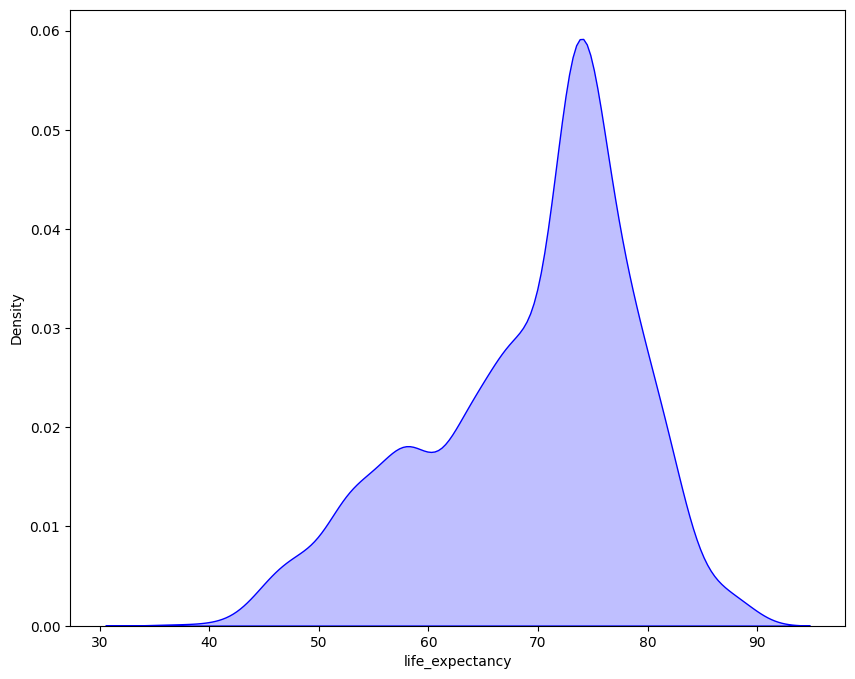

In [49]:
sns.distplot(
    df["life_expectancy"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

---

`Vamos a hacer el analisis solo para los paises en desarrollo.`

In [50]:
df1= pd.read_csv('../files/endesarrollo.csv', index_col=0)
df1.head(2)

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0


In [51]:
df1.shape

(2410, 21)

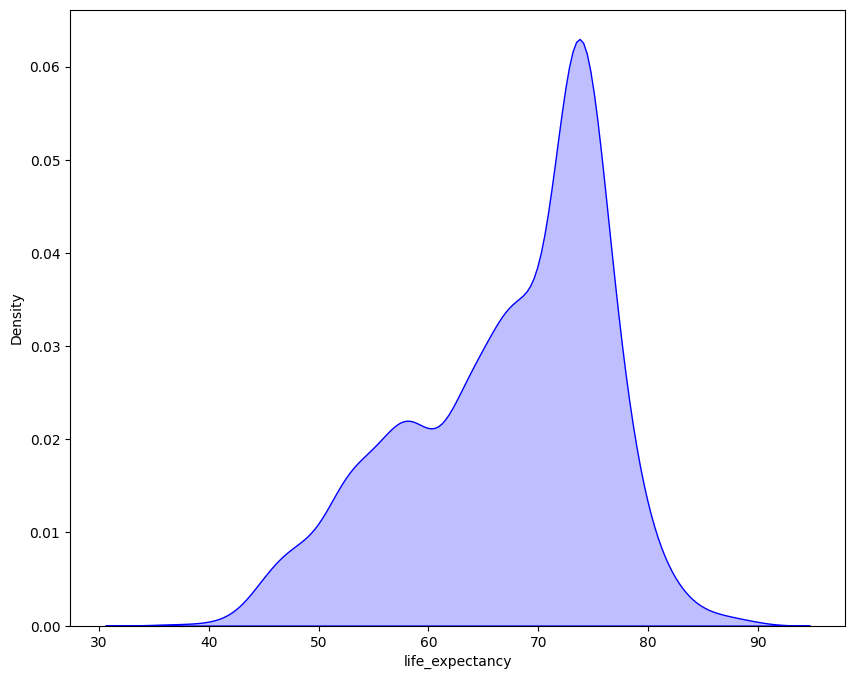

In [52]:
sns.distplot(
    df1["life_expectancy"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [53]:
df1['life_expectancy'].skew()

-0.6261669167348427

Asimetrica

In [54]:
kurtosistest(df1['life_expectancy'])

KurtosistestResult(statistic=-4.698075755729844, pvalue=2.6262402793189304e-06)

p-valor menor 0.05 datos No son normales

In [55]:
stats.shapiro(df1["life_expectancy"])


ShapiroResult(statistic=0.9485048055648804, pvalue=2.829572663175081e-28)

p-valor menor 0.05 datos No son normales

---

`Analisis paises desarrollados.`

In [56]:
df2= pd.read_csv('../files/desarrollados.csv', index_col=0)

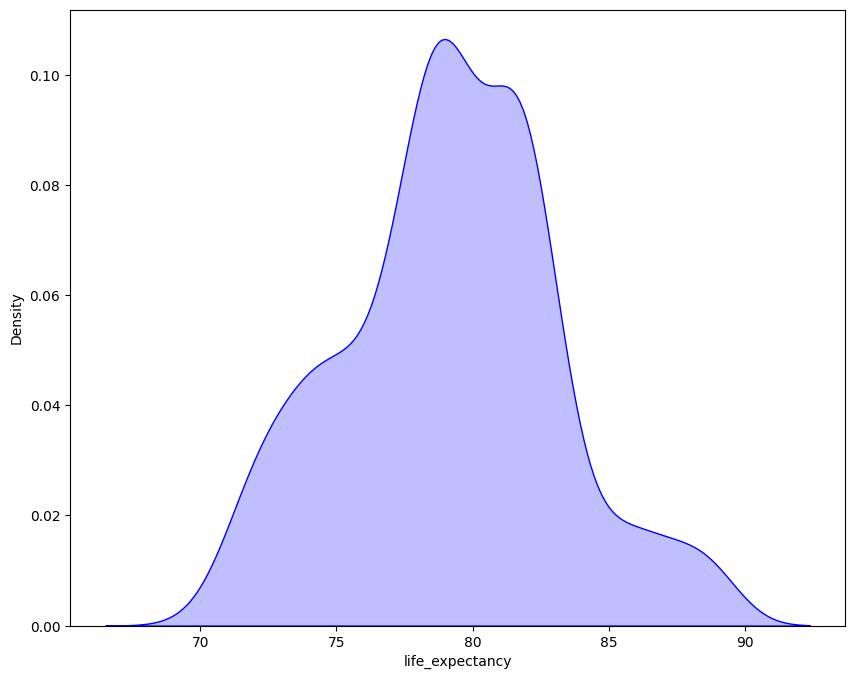

In [57]:
sns.distplot(
    df2["life_expectancy"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [58]:
kurtosistest(df2['life_expectancy'])

KurtosistestResult(statistic=-0.49256031313779486, pvalue=0.6223232958791044)

p-valor mayor 0.05 datos son normales

In [60]:
stats.shapiro(df2["life_expectancy"])

ShapiroResult(statistic=0.984403133392334, pvalue=2.6695464839576744e-05)

p-valor menor 0.05 datos No son normales